<a href="https://colab.research.google.com/github/nithinrk11/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship/blob/main/_VOIC_for_tech_DoctorsVisit_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Load the dataset

In [ ]:
!git clone https://github.com/nithinrk11/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship.git
%cd Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship
df = pd.read_csv('/content/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship/Datasets/DoctorVisits-DA.csv')

Cloning into 'Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 203.62 KiB | 2.37 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship


##Exploratory Data Analysis

In [ ]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


>We can see that the dataset consists 5190 rows of data and 11 columns or features.
* The dataset looks perfectly organised with no null values in any columns.

>### **About the dataset features:**
* **visits** =	Number of  doctor visits in past 2 weeks.
* **gender** =	Factor indicating gender.
* **age** =	Age in years divided by 100.
* **income** =	Annual income in dollars.
* **illness** =	Number of illnesses in past 2 weeks.
* **reduced** =	Number of days of reduced activity in past 2 weeks due to illness or injury.
* **health** =	General health questionnaire score using Goldberg's method.
* **private** =  Does the individual have private health insurance?.
* **freepoor** =  Does the individual have free government health insurance due to low income?
* **freerepat** =  Does the individual have free government health insurance due to old age, disability or veteran status?
* **nchronic** =  Is there a chronic condition not limiting activity?
* **lchronic** =  Is there a chronic condition limiting activity?


---
> ## **Problem Statements:**

* **Understanding Healthcare Utilization:** Analyze the factors influencing the number of doctor visits, such as age, income, and health status.

* **Gender Disparities:** Investigate if there are any significant differences in healthcare utilization between genders.

* **Impact of Socioeconomic Status:** Examine how income and access to private health insurance affect healthcare utilization.

---
> ## **Expected End Users:**

  * **Healthcare Providers**: To optimize resource allocation and improve patient care strategies.
  * **Policy Makers:** To design policies that address disparities in healthcare access and utilization.
  * **Researchers**: To study the socio-economic factors affecting healthcare utilization.

---
##**Health Care Utilization and Gender Analysis**

>let us convert the age and income values to their proper values ie., multiply age values by 100 and income by 10000.

In [ ]:
#Preprocessing age and income data
df['age'] = df['age'] * 100
df['age'] = df['age'].round(0).astype(int)
print("Unique ages:", df['age'].unique())
df['income'] = df['income'] * 10000
df['income'] = df['income'].round(0).astype(int)
print("Unique incomes:", df['income'].unique())

Unique ages: [19 22 27 32 37 42 47 52 57 62 67 72]
Unique incomes: [ 5500  4500  9000  1500  3500  6500  2500     0   600 11000  7500   100
 13000 15000]


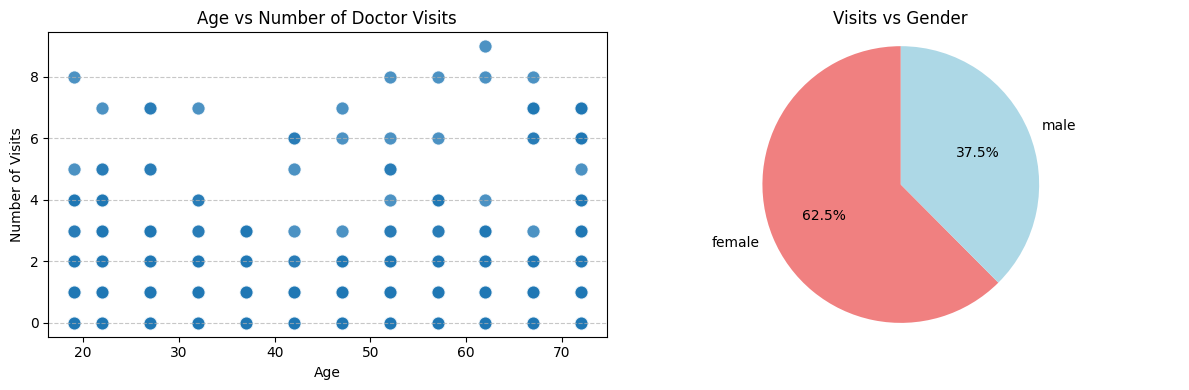

In [ ]:
# @title Age and Gender Vs Doctors Visit Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Age vs Visits
sns.scatterplot(data=df, x='age', y='visits', alpha=0.8, s=90, ax=axes[0])
axes[0].set_title('Age vs Number of Doctor Visits')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Visits')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

#Visits vs Gender
visits_by_gender = df.groupby('gender')['visits'].sum()
axes[1].pie(visits_by_gender, labels=visits_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[1].set_title('Visits vs Gender')
axes[1].axis('equal')


plt.tight_layout()
plt.show()


>We can see that patients aged 72 years has the most doctors visits followed by 22 years aged patients, and out of the total records females are dominant receiving with 62% of total doctors visits.

In [ ]:
#statistics by gender
gender_stats = df.groupby('gender')['visits'].agg(['mean', 'median', 'std']).round(3)

print("\nVisit statistics by gender:")
gender_stats


Visit statistics by gender:


,mean,median,std
gender,,,
female,0.362,0.0,0.858
male,0.236,0.0,0.722


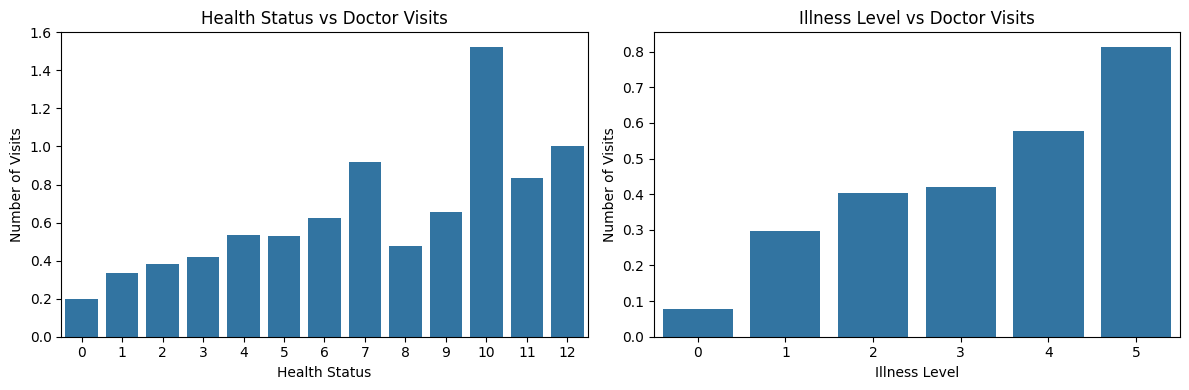

In [ ]:
# @title Health and Illness Vs Doctors Visit Analysis
# Combined Health Status and Illness Analysis Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Health Status vs Doctor Visits Plot
sns.barplot(x='health', y='visits', data=df, ax=axes[0], ci=None)  # Set ci=None to remove error bars
axes[0].set_title('Health Status vs Doctor Visits')
axes[0].set_xlabel('Health Status')
axes[0].set_ylabel('Number of Visits')

# Illness Level vs Doctor Visits Plot
sns.barplot(x='illness', y='visits', data=df, ax=axes[1], ci=None)  # Set ci=None to remove error bars
axes[1].set_title('Illness Level vs Doctor Visits')
axes[1].set_xlabel('Illness Level')
axes[1].set_ylabel('Number of Visits')

plt.tight_layout()
plt.show()


In [ ]:
#average visits by health status
health_visits = df.groupby('health')['visits'].mean()
print("\
Average visits by health status:")
print(health_visits)


Average visits by health status:
health
0     0.199273
1     0.335358
2     0.381166
3     0.417582
4     0.534759
5     0.530303
6     0.625000
7     0.918033
8     0.476190
9     0.656250
10    1.523810
11    0.833333
12    1.000000
Name: visits, dtype: float64


In [ ]:
#average visits by illness level
illness_visits = df.groupby('illness')['visits'].mean()
print("\
Average visits by illness level:")
print(illness_visits)

Average visits by illness level:
illness
0    0.078507
1    0.295482
2    0.403805
3    0.420664
4    0.576642
5    0.813559
Name: visits, dtype: float64


In [ ]:
#average visits by insurance status
insurance_visits = df.groupby('private')['visits'].mean()
print("\
Average visits by insurance status:")
print(insurance_visits)

#correlation between income and visits
income_correlation = df['income'].corr(df['visits'])
print("\
Correlation between Income and Visits:", income_correlation)

Average visits by insurance status:
private
no     0.307400
yes    0.294604
Name: visits, dtype: float64
Correlation between Income and Visits: -0.07683982934758839


In [ ]:
#correlation between age and visits
age_visits_correlation = df['age'].corr(df['visits'])

print(f"Correlation between age and visits: {age_visits_correlation}")

Correlation between age and visits: 0.12453676134371779


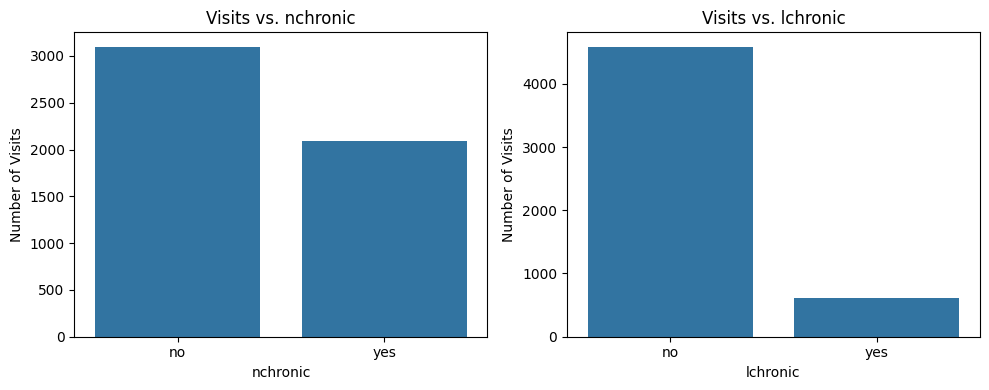

In [ ]:
# @title Life Activity Limiting Factors vs Doctors Visits
fig, axes = plt.subplots(1, 2, figsize=(10,4))

#visits vs nchronic
sns.countplot(x='nchronic', data=df, ax=axes[0]) # Use countplot for proper counts
axes[0].set_title('Visits vs. nchronic')
axes[0].set_xlabel('nchronic')
axes[0].set_ylabel('Number of Visits')

#visits vs lchronic
sns.countplot(x='lchronic', data=df, ax=axes[1]) # Use countplot for proper counts
axes[1].set_title('Visits vs. lchronic')
axes[1].set_xlabel('lchronic')
axes[1].set_ylabel('Number of Visits')

plt.tight_layout()
plt.show()

> ### Understanding Healthcare Utilization:
* Age vs. Doctor Visits: The correlation between age and visits is weak at 0.125, indicating age is not a strong predictor of doctor visits.
* Health Status vs. Doctor Visits: As expected, poorer health status correlates with more doctor visits.
* Illness Level vs. Doctor Visits: Higher illness levels are associated with increased doctor visits.
* nchronic vs. lchronic: it appears that patients without chronic conditions (whether limiting or non-limiting) have more doctor visits than those who do.
* This can provide insights into healthcare needs and service utilization, suggesting that factors other than the presence of chronic conditions may drive visits, such as prevention, check-ups, or other health concerns. For those with limiting chronic conditions, fewer visits might be due to accessibility challenges or other healthcare barriers.

> ### Gender Disparities:

* Females have a higher average number of doctor visits compared to males, suggesting potential gender differences in healthcare utilization.

---
##**Socio Economic Analysis**

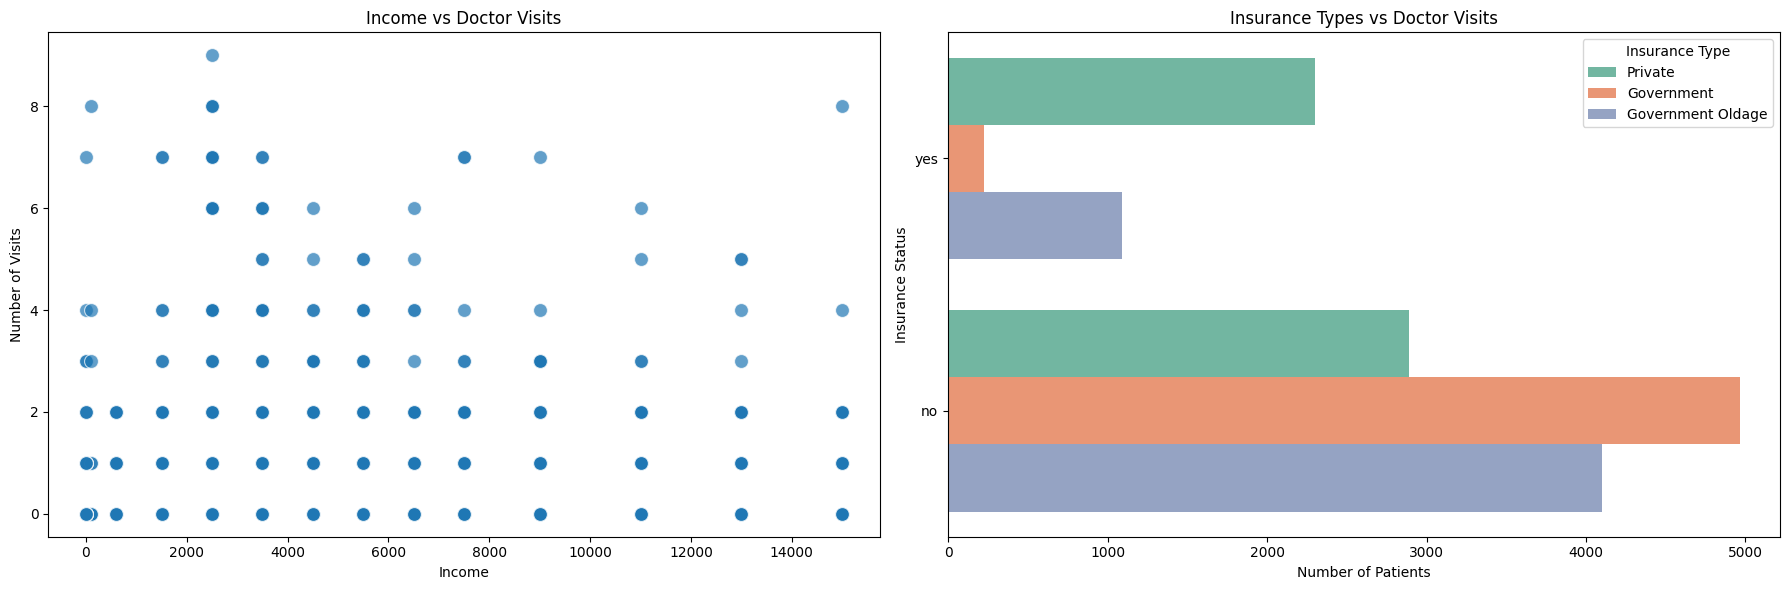

In [ ]:
# @title Income levels and Insurance Type Vs Doctors Visit

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Income vs Doctor Visits (scatter plot)
sns.scatterplot(data=df, x='income', s=100, y='visits', alpha=0.7, ax=axes[0])
axes[0].set_title('Income vs Doctor Visits')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Number of Visits')

# Creating a new dataframe that combines the necessary columns for the parallel bar plot
df_melted = df.melt(value_vars=['private', 'freepoor', 'freerepat'],
                    var_name='Insurance Type', value_name='Status')

# Parallel bar plot (countplot)
sns.countplot(y='Status', hue='Insurance Type', data=df_melted, palette='Set2', ax=axes[1])

# Setting custom legend titles
axes[1].legend(title='Insurance Type', labels=['Private', 'Government', 'Government Oldage'])

# Adding titles and labels
axes[1].set_title('Insurance Types vs Doctor Visits')
axes[1].set_xlabel('Number of Patients')
axes[1].set_ylabel('Insurance Status')


plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#correlation between income and visits
income_correlation = df['income'].corr(df['visits'])
print("\
Correlation between Income and Visits:", income_correlation)

Correlation between Income and Visits: -0.07683982934758839


In [ ]:
#average visits by insurance status
insurance_visits = df.groupby('private')['visits'].mean()
print("\
Average visits by insurance status:")
insurance_visits

Average visits by insurance status:


,visits
private,
no,0.307400
yes,0.294604


> ### Socio Economic Status:

* Among the three categories (Private, Freepoor, and Freerepat), the plot indicates a majority of patients are not reliant on insurance, with Private being the more preferred option among those with insurance.
* Income shows a weak negative correlation with doctor visits, indicating it is not a significant predictor.
* Private insurance status shows a slight difference in the average number of visits, with insured individuals having slightly fewer visits.
* This might indicate that many doctor visits are for routine checkups or consultations that do not require insurance claims, and Patients may rarely seek serious treatment or chronic condition management through their insurance.

---
> ## **Conclusion:**
* The analysis highlights that health status and illness levels are significant factors influencing healthcare utilization, while age and income are not strong predictors.
* Gender differences exist, with females utilizing healthcare services more than males.
* Socioeconomic factors like private insurance have a modest impact on healthcare utilization.
* These insights can guide healthcare providers and policymakers in designing targeted interventions to improve healthcare access and efficiency. Further research could explore additional variables or external factors influencing healthcare utilization.